In [83]:
import pandas as pd 

In [84]:
import numpy as np

In [85]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df= pd.read_csv(url,header=None)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df.columns=headers

In [86]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [87]:
df.replace('?',np.NaN,inplace=True)

In [126]:
df.dropna(subset=["price"],axis=0,inplace=True)

In [120]:
import matplotlib as plt
from matplotlib import pyplot


Text(0.5, 1.0, 'price bins')

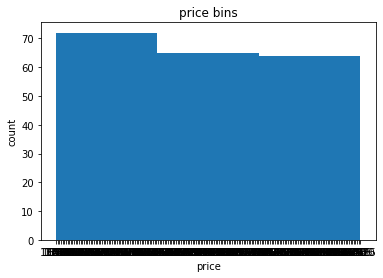

In [98]:
plt.hist(df["price"], bins=3)
plt.xlabel("price")
plt.ylabel("count")
plt.title("price bins")

In [99]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [100]:
df["price"].head(20)

0     13495
1     16500
2     16500
3     13950
4     17450
5     15250
6     17710
7     18920
8     23875
10    16430
11    16925
12    20970
13    21105
14    24565
15    30760
16    41315
17    36880
18     5151
19     6295
20     6575
Name: price, dtype: object

In [104]:
df["price"]= df["price"].astype('int')
df["horsepower"]=df["horsepower"].astype('float')

In [105]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower           float64
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

In [106]:
bins=np.linspace(min(df["price"]),max(df["price"]),4)
group_names=["low","medium","high"]
df["price-binned"]=pd.cut(df["price"],bins,labels=group_names,include_lowest=True)

In [107]:
df["price-binned"].value_counts()

low       171
medium     18
high       12
Name: price-binned, dtype: int64

In [108]:
df["drive-wheels"].value_counts().to_frame()


,drive-wheels
fwd,118
rwd,75
4wd,8


In [109]:
import seaborn as sns

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

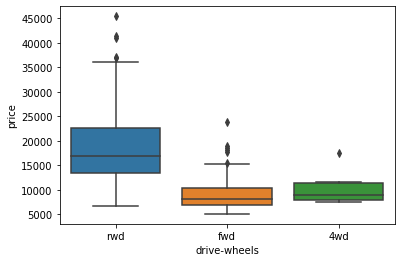

In [110]:
sns.boxplot(x="drive-wheels",y="price",data=df)

plt.title("scatterplot of enginesize vs price")
plt.xlabel("engine size")
plt.ylabel("price")

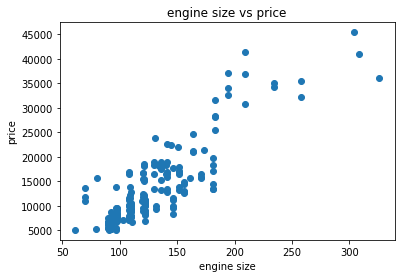

In [111]:
x=df["engine-size"]
y=df["price"]
plt.title("engine size vs price")
plt.xlabel("engine size")
plt.ylabel("price")
plt.scatter(x,y)

In [112]:
df_test=df[['drive-wheels','body-style','price']]
df_group=df_test.groupby(['drive-wheels','body-style'],as_index=False).mean()

In [113]:
df_group

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [114]:
df_pivot=df_group.pivot(index='drive-wheels',columns='body-style')

In [115]:
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

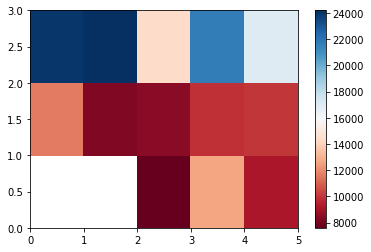

In [116]:
plt.pcolor(df_pivot,cmap='RdBu')
plt.colorbar()
plt.show()

(0.0, 54009.91214267324)

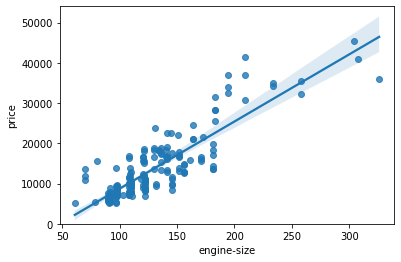

In [117]:
sns.regplot(x="engine-size",y="price",data=df)
plt.ylim(0,)

(0.0, 48176.47538889936)

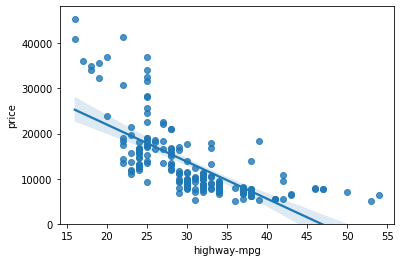

In [118]:
sns.regplot(x="highway-mpg",y="price",data=df)
plt.ylim(0,)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U4'), dtype('float64')) -> None

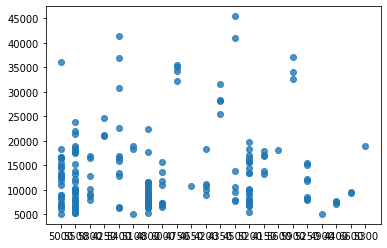

In [121]:
sns.regplot(x="peak-rpm",y="price",data=df)
plt.ylim(0,)

In [134]:
import scipy

In [135]:
from scipy import stats

In [129]:
pearson_coeff,p_value=stats.pearsonr(df['horsepower'],df['price'])

In [82]:
df.dtypes


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [127]:
df.dropna(subset=["horsepower"],axis=0,inplace=True)

In [130]:
pearson_coeff


0.8105330821322062

In [132]:
p_value

1.1891278276947142e-47

In [136]:
scipy.stats.chi2_contingency(cont_table,correction=True)

NameError: name 'cont_table' is not defined